<a href="https://colab.research.google.com/github/vini52/correlacao-regressao/blob/main/correlacao_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CORRELAÇÃO E REGRESSÃO LINEAR SIMPLES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Análise e Tratamento dos Dados**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
mola = pd.read_csv('/content/drive/MyDrive/Estatistica Aplicada/rigidez.csv',
                    sep=';', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

**Objetivo: Analisar a correlação entre a força e a deformação sofrida por uma mola e criar um modelo de regressão linear.**

In [ ]:
mola.head(5)

,cargas,forca,Lo,L,x,K
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


In [ ]:
mola.shape

(30, 6)

In [ ]:
# Renomear uma variável
mola.rename(columns={'Lo': 'compr_inicial'}, inplace=True)

In [ ]:
mola.head()

,cargas,forca,compr_inicial,L,x,K
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


In [ ]:
# Renomear mais de uma variável
mola.rename(columns={'L': 'compr_final','x': 'deformacao', 'K': 'rigidez'}, inplace=True)

In [ ]:
mola.head()

,cargas,forca,compr_inicial,compr_final,deformacao,rigidez
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


In [ ]:
# Análise dos tipos de atributos.
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
mola.dtypes

cargas             int64
forca            float64
compr_inicial    float64
compr_final      float64
deformacao       float64
rigidez          float64
dtype: object

In [ ]:
# Excluir variável
mola1 = mola.drop(columns=['compr_inicial'])
mola1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
2,3,0.18,NaN,NaN,NaN
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34


Valores Missing (NAN)

In [ ]:
# RELAÇÃO DA QUANTIDADE
mola1.isnull().sum()

cargas         0
forca          0
compr_final    1
deformacao     1
rigidez        1
dtype: int64

In [ ]:
mola1['deformacao'].isnull().sum()

1

In [ ]:
# EXCLUIR TODOS OS VALORES MISSING
mola1 = mola1.dropna()

In [ ]:
mola1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34
5,6,0.45,41.40,0.0144,31.25


In [ ]:
mola1.describe()

,cargas,forca,compr_final,deformacao,rigidez
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.931034,1.565172,139.050690,0.112050,30.823448
std,8.631053,0.961567,343.474372,0.343475,5.840459
min,1.000000,0.100000,29.900000,0.002900,1.640000
25%,9.000000,0.720000,50.000000,0.023000,30.770000
50%,16.000000,1.550000,76.400000,0.049400,31.300000
75%,23.000000,2.250000,99.740000,0.072740,32.860000
max,30.000000,3.200000,1918.000000,1.891000,36.340000


In [ ]:
# SUBSTITUIR OS VALORES MISSING PELA MEDIANA
mola1['compr_final'].fillna(mola1['compr_final'].median(), inplace=True)

In [ ]:
mola1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
2,3,0.18,76.40,NaN,NaN
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34


In [ ]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
mola1['deformacao'].fillna(mola1['deformacao'].mean(), inplace=True)

In [ ]:
mola1.rigidez.value_counts()

rigidez
30.81    3
31.30    2
34.48    1
1.64     1
30.77    1
31.89    1
31.40    1
30.57    1
30.93    1
30.63    1
30.54    1
30.18    1
29.68    1
31.38    1
34.88    1
31.91    1
31.03    1
33.63    1
33.87    1
33.33    1
33.66    1
31.98    1
31.25    1
36.34    1
32.86    1
30.02    1
Name: count, dtype: int64

In [ ]:
# SUBSTITUIR OS VALORES MISSING PELA MODA
mola1['rigidez'].fillna(30.81, inplace=True)

In [ ]:
mola1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
2,3,0.18,76.40,0.11205,30.81
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34


Análise dos outliers

In [ ]:
import plotly.express as px

In [ ]:
boxplot = px.box(mola1, y="forca")
boxplot.show()

In [ ]:
boxplot = px.box(mola1, y="deformacao")
boxplot.show()

In [ ]:
mola1.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
2,3,0.18,76.40,0.11205,30.81
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33


In [ ]:
boxplot = px.box(mola1, y="rigidez")
boxplot.show()

In [ ]:
mola1.head(30)

In [ ]:
mola1.drop(28, inplace=True)

In [ ]:
mola1.drop(2, inplace=True)

In [ ]:
mola1.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33
10,11,1.05,58.00,0.03100,33.87


# **ANÁLISE DA CORRELAÇÃO LINEAR**

In [ ]:
import matplotlib.pyplot as plt

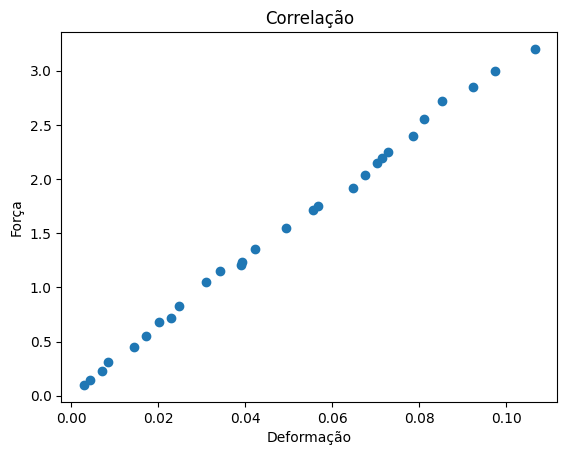

In [ ]:
plt.scatter(mola1.deformacao,mola1.forca)
plt.title('Correlação')
plt.xlabel('Deformação')
plt.ylabel('Força')
plt.grid(False)
plt.show()

In [ ]:
import seaborn as sns

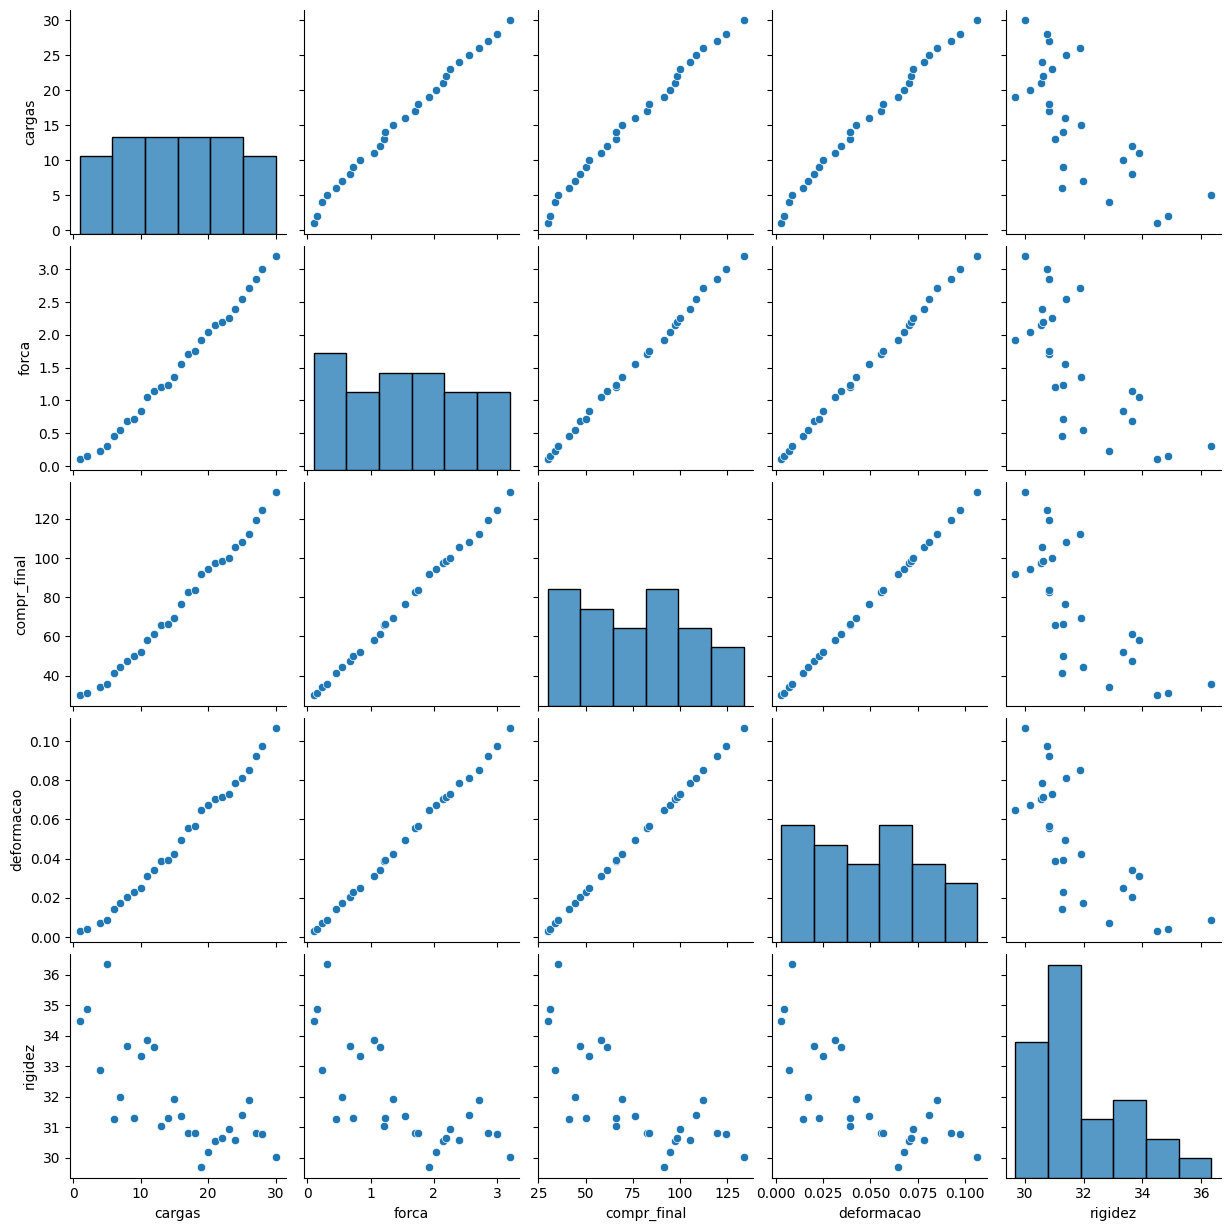

In [ ]:
sns.pairplot(mola1);

## Análise da Normalidade

Gráfico QQ-Plot

In [ ]:
import scipy.stats as stats

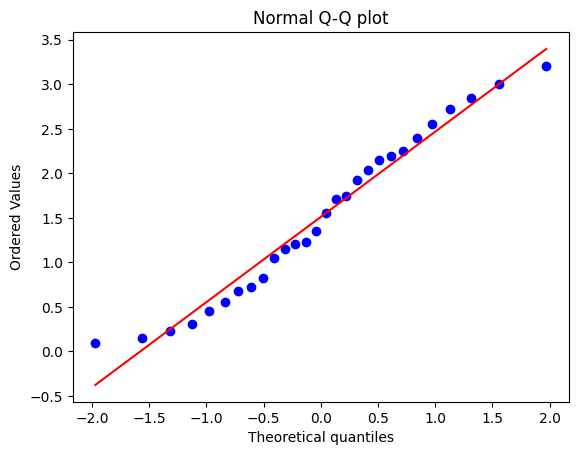

In [ ]:
stats.probplot(mola1['forca'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

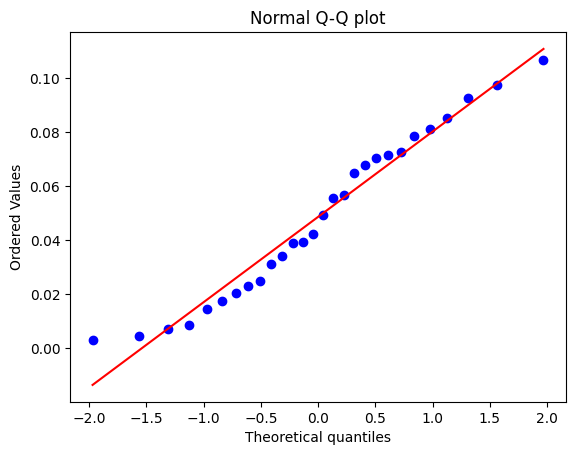

In [ ]:
stats.probplot(mola1['deformacao'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
stats.shapiro(mola1.forca)

ShapiroResult(statistic=0.9576825499534607, pvalue=0.306829571723938)

In [ ]:
estatistica, p = stats.shapiro(mola1.forca)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9576825499534607
p-valor: 0.306829571723938


In [ ]:
estatistica, p = stats.shapiro(mola1.deformacao)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9549091458320618
p-valor: 0.2625334858894348


Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(mola1.forca, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(mola1.deformacao, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

## Correlação Linear

Pearson (distribuição normal) quando as duas variaveis tem distribuicao normal

Spearman (distribuição não normal) n > 30

Kendall (distribuição não normal com quantidade pequena de amostras) n < 30

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [ ]:
# Pearson
coef,p = stats.pearsonr(mola1.deformacao,mola1.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9990785169672951
p-valor: 4.36288535226053e-37


In [ ]:
# Spearman
coef,p = stats.spearmanr(mola1.deformacao,mola1.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9999999999999998
p-valor: 4.0494065550148204e-201


In [ ]:
# Kendall
coef,p = stats.kendalltau(mola1.deformacao,mola1.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 1.0
p-valor: 6.559778474139676e-30


In [ ]:
correlacoes = mola1.corr(method='pearson')
correlacoes

,cargas,forca,compr_final,deformacao,rigidez
cargas,1.000000,0.997073,0.995672,0.995670,-0.728749
forca,0.997073,1.000000,0.999079,0.999079,-0.713098
compr_final,0.995672,0.999079,1.000000,1.000000,-0.730160
deformacao,0.995670,0.999079,1.000000,1.000000,-0.730224
rigidez,-0.728749,-0.713098,-0.730160,-0.730224,1.000000


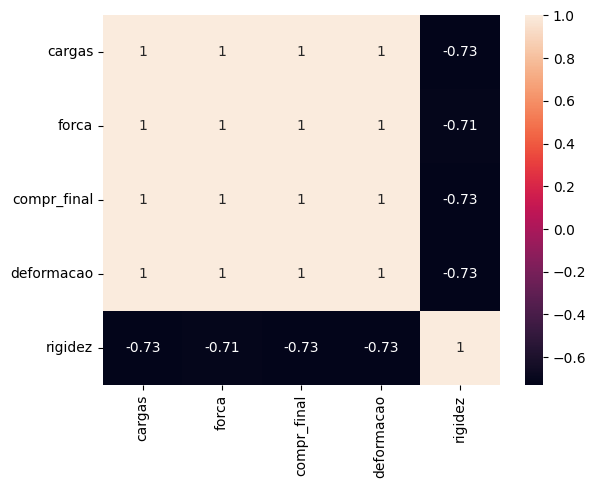

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

# **MODELO DE REGRESSÃO LINEAR**

## Regressão Linear com Statsmodels

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
# Criação do modelo
#(y ~ x)
regressao = smf.ols('forca ~ deformacao', data = mola1).fit()

In [ ]:
residuos = regressao.resid
residuos

0    -0.031277
1    -0.023602
3    -0.025230
4     0.009421
5    -0.028951
6    -0.013603
7     0.025700
8    -0.018951
9     0.033607
10    0.069188
11    0.072444
12   -0.012673
13   -0.001742
14    0.027560
15    0.012909
16   -0.011510
17   -0.010812
18   -0.079650
19   -0.047324
20   -0.021975
21   -0.015231
22    0.007280
23   -0.016859
24    0.051513
25    0.097559
26    0.009885
27    0.008722
29   -0.066394
dtype: float64

### Teste de Normalidade dos resíduos

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.959948718547821
p-valor: 0.3476985692977905


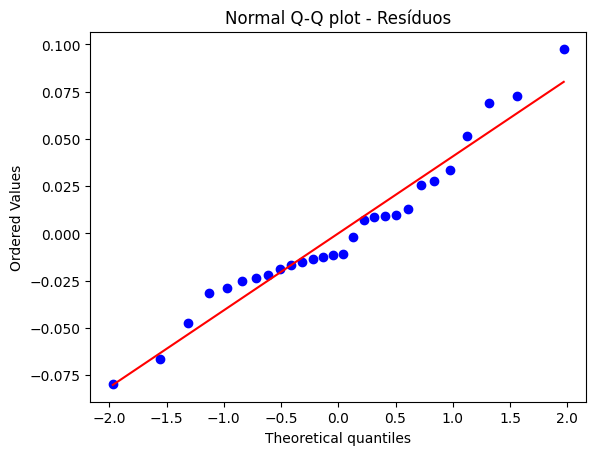

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

**Modelo aprovado**

### **Regressão Linear**

y = mx + b
m = coeficiente de x
b = intercepto

In [ ]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  forca   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Wed, 22 May 2024   Prob (F-statistic):           4.36e-37
Time:                        19:34:15   Log-Likelihood:                 50.909
No. Observations:                  28   AIC:                            -97.82
Df Residuals:                      26   BIC:                            -95.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0436      0.015      2.994      0.0

y = 30.2326*x + 0.0436
r^2 = 0.998

Estatística t:

Ho = coeficiente igual a zero : p > 0,05 (coeficiente não validado)

Ha = coeficiente diferente de zero: p <= 0,05 (coeficiente validado)

**Equação: Força = 0,0436 + 30,2326.deformação**

**R^2 ajustado = 0,998**

In [ ]:
regressao.params

Intercept      0.043602
deformacao    30.232571
dtype: float64

In [ ]:
mola1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34
5,6,0.45,41.40,0.0144,31.25


In [ ]:
regressao.predict()

array([0.13127682, 0.17360242, 0.25523036, 0.30057922, 0.47895139,
       0.56360259, 0.6543003 , 0.7389515 , 0.79639338, 0.98081207,
       1.07755629, 1.22267264, 1.23174241, 1.32244012, 1.53709137,
       1.72151006, 1.7608124 , 1.99964971, 2.08732417, 2.17197536,
       2.20523119, 2.24271958, 2.41685919, 2.49848713, 2.62244067,
       2.84011518, 2.99127804, 3.26639443])

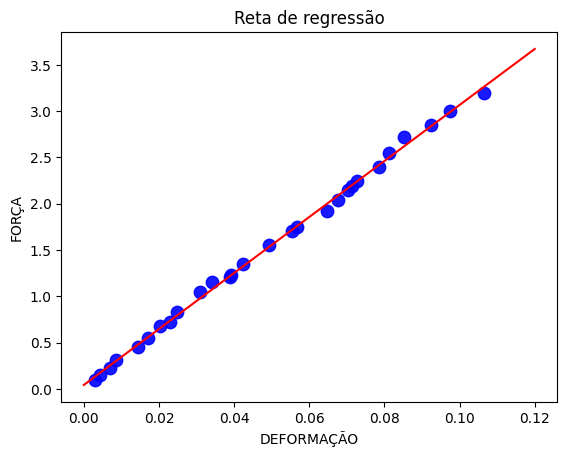

In [ ]:
plt.scatter(y=mola1.forca, x=mola1.deformacao, color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0, 0.12)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('FORÇA')
plt.xlabel('DEFORMAÇÃO')
plt.show()

Exercicio

rigidez / forca

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
#verificar normalidade
estatistica, p = stats.shapiro(mola1.rigidez)
print(f'Estatística do teste: {estatistica}')
print(f'p-valor: {p}')

Estatística do teste: 0.888152539730072
p-valor: 0.006106507033109665


In [ ]:
estatistica, p = stats.shapiro(mola1.forca)
print(f'Estatística do teste: {estatistica}')
print(f'p-valor: {p}')

Estatística do teste: 0.9576825499534607
p-valor: 0.306829571723938


In [ ]:
# Kendall
coef,p = stats.kendalltau(mola1.rigidez,mola1.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: -0.5319224186026076
p-valor: 7.656428156093596e-05


In [ ]:
regressao = smf.ols('rigidez ~ forca', data = mola1).fit()


In [ ]:
residuos = regressao.resid
residuos

0     0.839591
1     1.302507
3    -0.616826
4     2.963840
5    -1.949994
6    -1.094161
7     0.749422
8    -1.560245
9     0.608172
10    1.425004
11    1.310837
12   -1.213663
13   -0.918496
14   -0.157497
15   -0.435830
16   -0.804498
17   -0.754164
18   -1.670248
19   -1.019249
20   -0.520832
21   -0.380499
22   -0.004999
23   -0.176250
24    0.842500
25    1.546416
26    0.629999
27    0.778748
29    0.280414
dtype: float64

In [ ]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9698914289474487
p-valor: 0.5776774883270264


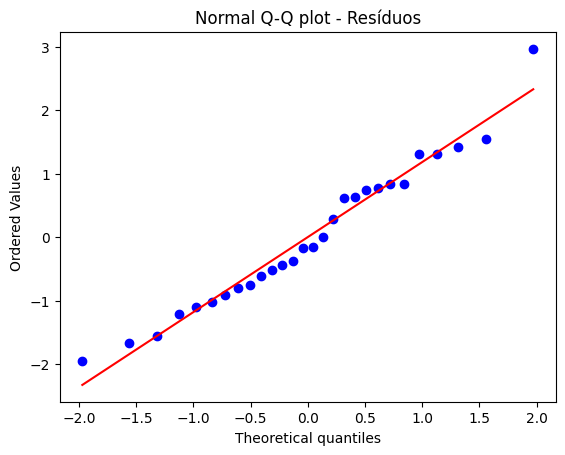

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

In [ ]:
print(regressao.summary())


                            OLS Regression Results                            
Dep. Variable:                rigidez   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     26.90
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.06e-05
Time:                        20:29:42   Log-Likelihood:                -43.205
No. Observations:                  28   AIC:                             90.41
Df Residuals:                      26   BIC:                             93.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7662      0.428     78.810      0.0

rigidez = -1.2583*x + 33.7662
r^2 = 0.509

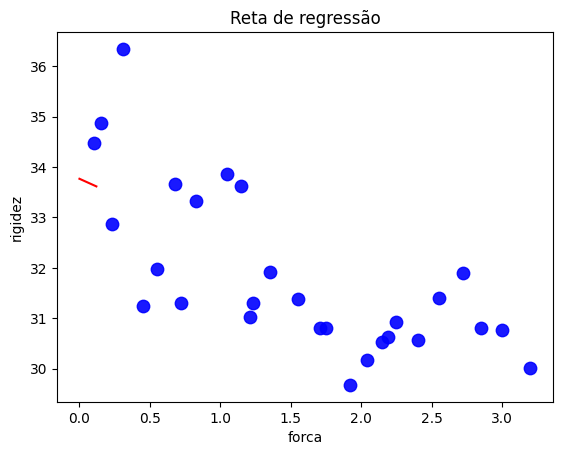

In [ ]:
plt.scatter(y=mola1.forca, x=mola1.rigidez, color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0, 0.12)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('rigidez')
plt.xlabel('forca')
plt.show()